In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


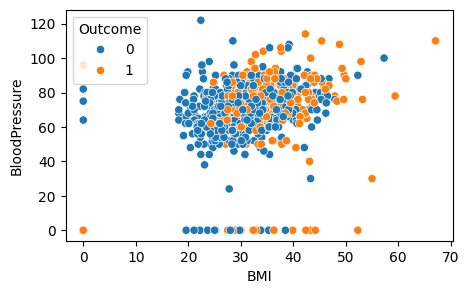

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df,x="BMI",y="BloodPressure",hue="Outcome")
plt.show()

In [ ]:
x = df[['BMI', 'BloodPressure']]
y = df.iloc[:,-1]

In [ ]:
x

,BMI,BloodPressure
0,33.6,72
1,26.6,66
2,23.3,64
3,28.1,66
4,43.1,40
...,...,...
763,32.9,76
764,36.8,70
765,26.2,72
766,30.1,60


In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [ ]:
print(lor.intercept_)
print(lor.coef_)

[-3.62916861]
[[ 0.09411584 -0.00109511]]


In [ ]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

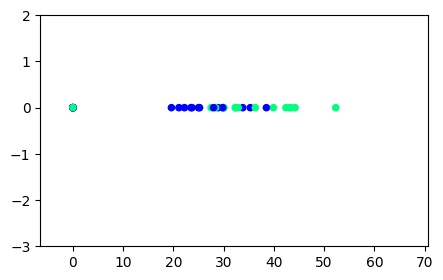

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x['BMI'], x['BloodPressure'], c=y, cmap='winter', s=20)
plt.ylim(-3,2)

In [ ]:
lor.predict([[33.8,76]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
560,6,125,76,0,0,33.8,0.121,54,1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

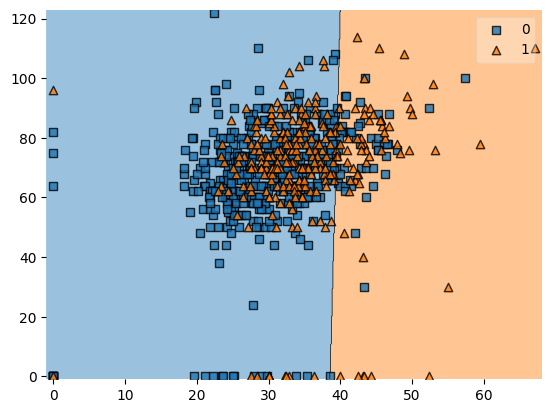

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lor)

# SOFTMAX REGRESSION

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

<ipython-input-6-76719988b203>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(), inplace=True)


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-7-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [ ]:
df.drop(["PassengerId","Name","Ticket","SibSp","Pclass","Survived","Parch"],inplace=True,axis=1)

In [ ]:
df.head(2)

,Sex,Age,Fare,Cabin,Embarked
0,male,34.5,7.8292,NaN,1
1,female,47.0,7.0000,NaN,2


In [ ]:
x = df[["Age","Fare"]]
y = df["Embarked"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6904761904761905


In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,3,0,10
1,0,0,12
2,4,0,55


In [ ]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.12689433, 0.14367835, 0.72942732]])

In [ ]:
clf.predict(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


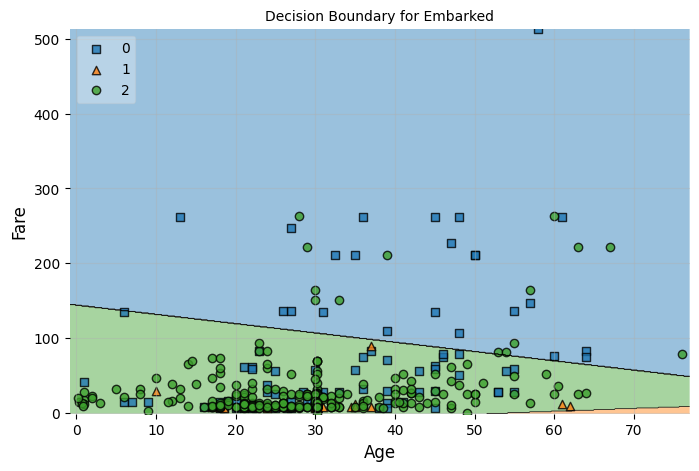

In [ ]:
plt.figure(figsize=(8, 5))  # Increase the figure size for clarity
plot_decision_regions(x.values, y.values, clf, legend=2)  # Set legend to 2 for better display

# Adding axes annotations
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Decision Boundary for Embarked', fontsize=10)

# Adding grid for better understanding
plt.grid(alpha=0.4)

plt.show()

In [ ]:
import seaborn as sns

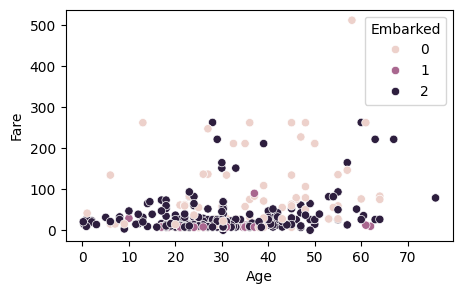

In [ ]:
plt.figure(figsize =(5,3))
sns.scatterplot(data=df,x="Age",y="Fare",hue = "Embarked")
plt.show()

In [ ]:
df.drop(["Sex"],axis = 1,inplace=True)

In [ ]:
df.drop(["Cabin"],axis = 1,inplace=True)

# Polynomial Feathure practise

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<Axes: xlabel='Glucose', ylabel='BMI'>

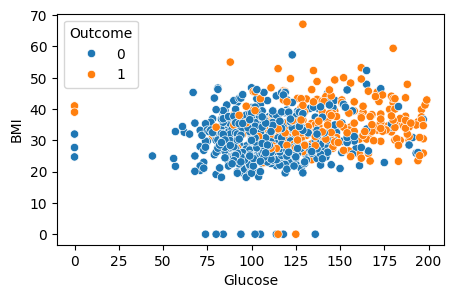

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df,x="Glucose",y="BMI",hue="Outcome")

In [ ]:
X = df[["Glucose","BMI"]]
y = df["Outcome"]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.7590909090909091

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=,include_bias=False)
X_trf = poly.fit_transform(X)

In [ ]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

0.6510594668489406

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

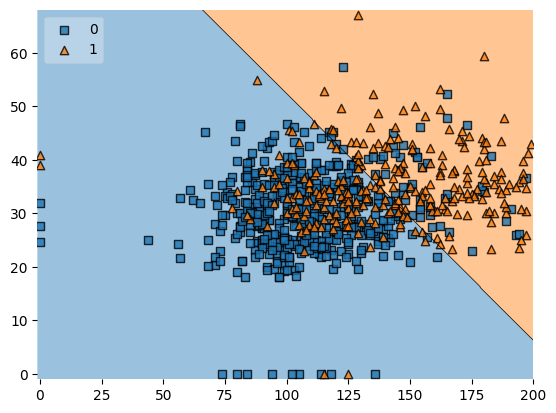

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Convert X to a NumPy array using .values
plot_decision_regions(X.values, y.values.astype('int'), clf, legend=2)